In [5]:
# 전처리 완료 데이터 가져오기 
raw_data = pd.read_csv('./data/raw_data.csv', index_col=0)

In [6]:
raw_data.head()

,연,월,일,시간대,요일,기온,강수량,풍속,습도,적설량,미세먼지,초미세먼지,공휴일,통화건수
0,2016,10,1,0,토,19.4,0.0,0.8,73.0,0.0,48.0,26.0,0,67.0
1,2016,10,1,1,토,18.8,0.0,1.3,77.0,0.0,48.0,26.0,0,27.0
2,2016,10,1,10,토,20.7,0.0,1.8,72.0,0.0,48.0,26.0,0,10.0
3,2016,10,1,11,토,21.6,0.0,0.6,65.0,0.0,48.0,26.0,0,28.0
4,2016,10,1,12,토,24.0,0.0,1.5,55.0,0.0,48.0,26.0,0,64.0


In [7]:
# '월' 카테고리 이상치 데이터 제거 
dum = raw_data['월'].value_counts()
dum

12    2232
10    2232
8     2232
7     2232
5     2232
3     2232
1     2232
11    2160
9     2160
6     2160
4     2160
2     2016
Name: 월, dtype: int64

In [10]:
# '풍속' 결측 데이터 제거 
mean_wind = raw_data['풍속'].mean(axis=0)
raw_data['풍속'].fillna(method='bfill',inplace=True) #bfill > 뒤에 있는 값을 가져옴 ; 이후 시간대의 풍속과 비슷할것으로 판단함 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연       26280 non-null  int64  
 1   월       26280 non-null  int64  
 2   일       26280 non-null  int64  
 3   시간대     26280 non-null  int64  
 4   요일      26280 non-null  object 
 5   기온      26280 non-null  float64
 6   강수량     26280 non-null  float64
 7   풍속      26280 non-null  float64
 8   습도      26280 non-null  float64
 9   적설량     26280 non-null  float64
 10  미세먼지    26280 non-null  float64
 11  초미세먼지   26280 non-null  float64
 12  공휴일     26280 non-null  int64  
 13  통화건수    26280 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 3.0+ MB


In [167]:
raw_data

,연,월,일,시간대,요일,기온,강수량,풍속,습도,적설량,미세먼지,초미세먼지,공휴일,통화건수
0,2016,10,1,0,토,19.4,0.0,0.8,73.0,0.0,48.0,26.0,0,67.0
1,2016,10,1,1,토,18.8,0.0,1.3,77.0,0.0,48.0,26.0,0,27.0
2,2016,10,1,10,토,20.7,0.0,1.8,72.0,0.0,48.0,26.0,0,10.0
3,2016,10,1,11,토,21.6,0.0,0.6,65.0,0.0,48.0,26.0,0,28.0
4,2016,10,1,12,토,24.0,0.0,1.5,55.0,0.0,48.0,26.0,0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2019,9,30,5,월,17.1,0.0,1.6,84.0,0.0,51.0,30.0,0,0.0
26276,2019,9,30,6,월,16.7,0.0,1.6,85.0,0.0,51.0,30.0,0,0.0
26277,2019,9,30,7,월,16.4,0.0,1.5,85.0,0.0,51.0,30.0,0,5.0
26278,2019,9,30,8,월,17.4,0.0,1.4,72.0,0.0,51.0,30.0,0,0.0


In [168]:
# ['연', '월', '일', '시간대', '요일', '공휴일'] 인코딩

df = pd.get_dummies(raw_data, columns=['연', '월', '일', '시간대', '요일', '공휴일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기온      26280 non-null  float64
 1   강수량     26280 non-null  float64
 2   풍속      26280 non-null  float64
 3   습도      26280 non-null  float64
 4   적설량     26280 non-null  float64
 5   미세먼지    26280 non-null  float64
 6   초미세먼지   26280 non-null  float64
 7   통화건수    26280 non-null  float64
 8   연_2016  26280 non-null  uint8  
 9   연_2017  26280 non-null  uint8  
 10  연_2018  26280 non-null  uint8  
 11  연_2019  26280 non-null  uint8  
 12  월_1     26280 non-null  uint8  
 13  월_2     26280 non-null  uint8  
 14  월_3     26280 non-null  uint8  
 15  월_4     26280 non-null  uint8  
 16  월_5     26280 non-null  uint8  
 17  월_6     26280 non-null  uint8  
 18  월_7     26280 non-null  uint8  
 19  월_8     26280 non-null  uint8  
 20  월_9     26280 non-null  uint8  
 21  월_10    26280 non-null  uint8  
 22

In [169]:
y_target = df['통화건수']
X_features = df.drop('통화건수',axis=1)

In [170]:
# 데이터 분리 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size= 0.3, random_state=13)

lr_reg= LinearRegression()
lr_reg.fit(X_train,y_train)

# 모델 예측 
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(rmse, mse)

17.77893272315291 316.0904487743974


In [45]:
# RMSE/MAE/r2 성능 확인 함수 

def evaluation_lin(y_test, pred, df):
    y_target = df['통화건수']
    X_features = df.drop('통화건수',axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size= 0.3, random_state=13)

    lr_reg= LinearRegression()
    lr_reg.fit(X_train,y_train)

    pred = lr_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    rmse_val = np.sqrt(mse)
    mae_val = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

In [46]:
evaluation_lin(y_test, pred,df)

RMSE : 17.77893 | MAE : 12.0081 | r2 : 0.87702 


In [108]:
### 릿지, 라쏘
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Ridge > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

lasso = Lasso()
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Lasso > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

Ridge > RMSE : 17.67965 | MAE : 11.94924 | r2 : 0.87692 
Lasso > RMSE : 17.649 | MAE : 11.94367 | r2 : 0.87735 


# <추가> Ridge/Lasso Gridsearch CV

In [140]:
# Ridge 하이퍼파라미터튜닝 alpha값이 클수록(penalty 증가) 계수의 크기가 줄어듬 -> 영향력이 큰 계수의 영향력을 줄임 / 변수를 축소, 다중공선성을 방지
from sklearn.model_selection import GridSearchCV
def ridge_grid_search_cv(X_train, y_train):
    param_grid = [
        {'alpha': [0, 0.05, 0.1, 0.5, 1, 5]},
        ]

    grid_search = GridSearchCV(ridge, param_grid, cv=5,
                              scoring='r2',
                              return_train_score=True)
    grid_search.fit(X_train, y_train)
    
    print ('best_params_: ', grid_search.best_params_)
    cvres = grid_search.cv_results_
    for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(mean_test_score, params)   

In [141]:
ridge_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0.5}
0.8633877597290527 {'alpha': 0}
0.8642005337985681 {'alpha': 0.05}
0.8642007720448444 {'alpha': 0.1}
0.8642019308356573 {'alpha': 0.5}
0.8642015250097235 {'alpha': 1}
0.8641267754863854 {'alpha': 5}


In [142]:
# Lasso 하이퍼파라미터튜닝 alpha 조금만 키워도 계수가 완전히 0이 되는 변수 증가 -> feaure selection, 중요한 변수만 택함, 
def lasso_grid_search_cv(X_train, y_train):
    param_grid = [
        {'alpha': [0, 0.05, 0.1, 0.5, 1]},
        ]

    grid_search = GridSearchCV(lasso, param_grid, cv=5,
                              scoring='r2',
                              return_train_score=True)
    grid_search.fit(X_train, y_train)
    print ('best_params_: ', grid_search.best_params_)
    cvres = grid_search.cv_results_
    for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(mean_test_score, params)   

In [143]:
lasso_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0}
0.8642002747166971 {'alpha': 0}
0.863434208570594 {'alpha': 0.05}
0.860765165235874 {'alpha': 0.1}
0.8049763782911837 {'alpha': 0.5}
0.6936781795039906 {'alpha': 1}


## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

## 재철파트 - Feature scaling

0. 피쳐 스케일링 없이
    - RMSE : 17.77893 | MAE : 12.0081 | r2 : 0.87702 
    - Ridge > RMSE : 17.77652 | MAE : 12.00152 | r2 : 0.87705 
    - Lasso > RMSE : 27.22169 | MAE : 20.12424 | r2 : 0.71169


1. 수치 feature들의 분포를 확인하고 편중된 feature는 로그화
    - RMSE : 17.78316 | MAE : 12.01545 | r2 : 0.87696 
    - Ridge > RMSE : 17.78075 | MAE : 12.00893 | r2 : 0.87699 
    - Lasso > RMSE : 27.22169 | MAE : 20.12424 | r2 : 0.71169


2. 수치 feature들 표준화(StandardScaler)
    - RMSE : 17.78588 | MAE : 12.01408 | r2 : 0.87692 
    - Ridge > RMSE : 17.78076 | MAE : 12.00895 | r2 : 0.87699 
    - Lasso > RMSE : 27.19568 | MAE : 20.19904 | r2 : 0.71224 


3. 이상치 제거(각 컬럼별 |z-score| >2 인 값들)
    - RMSE : 18.52559 | MAE : 12.10432 | r2 : 0.86883 
    - Ridge > RMSE : 18.52606 | MAE : 12.09717 | r2 : 0.86883 
    - Lasso > RMSE : 28.06475 | MAE : 20.28835 | r2 : 0.69898 


4. 정규화(MinMaxScaler)
    - RMSE : 18.52562 | MAE : 12.1041 | r2 : 0.86883 
    - Ridge > RMSE : 18.52612 | MAE : 12.09704 | r2 : 0.86883 
    - Lasso > RMSE : 28.01538 | MAE : 20.69272 | r2 : 0.70003 
    
    
### 결론: 피쳐스케일링 안한 Ridge가 가장 성능이 좋더라ㅠ

In [144]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import rc
rc('font', family='Arial Unicode MS')
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

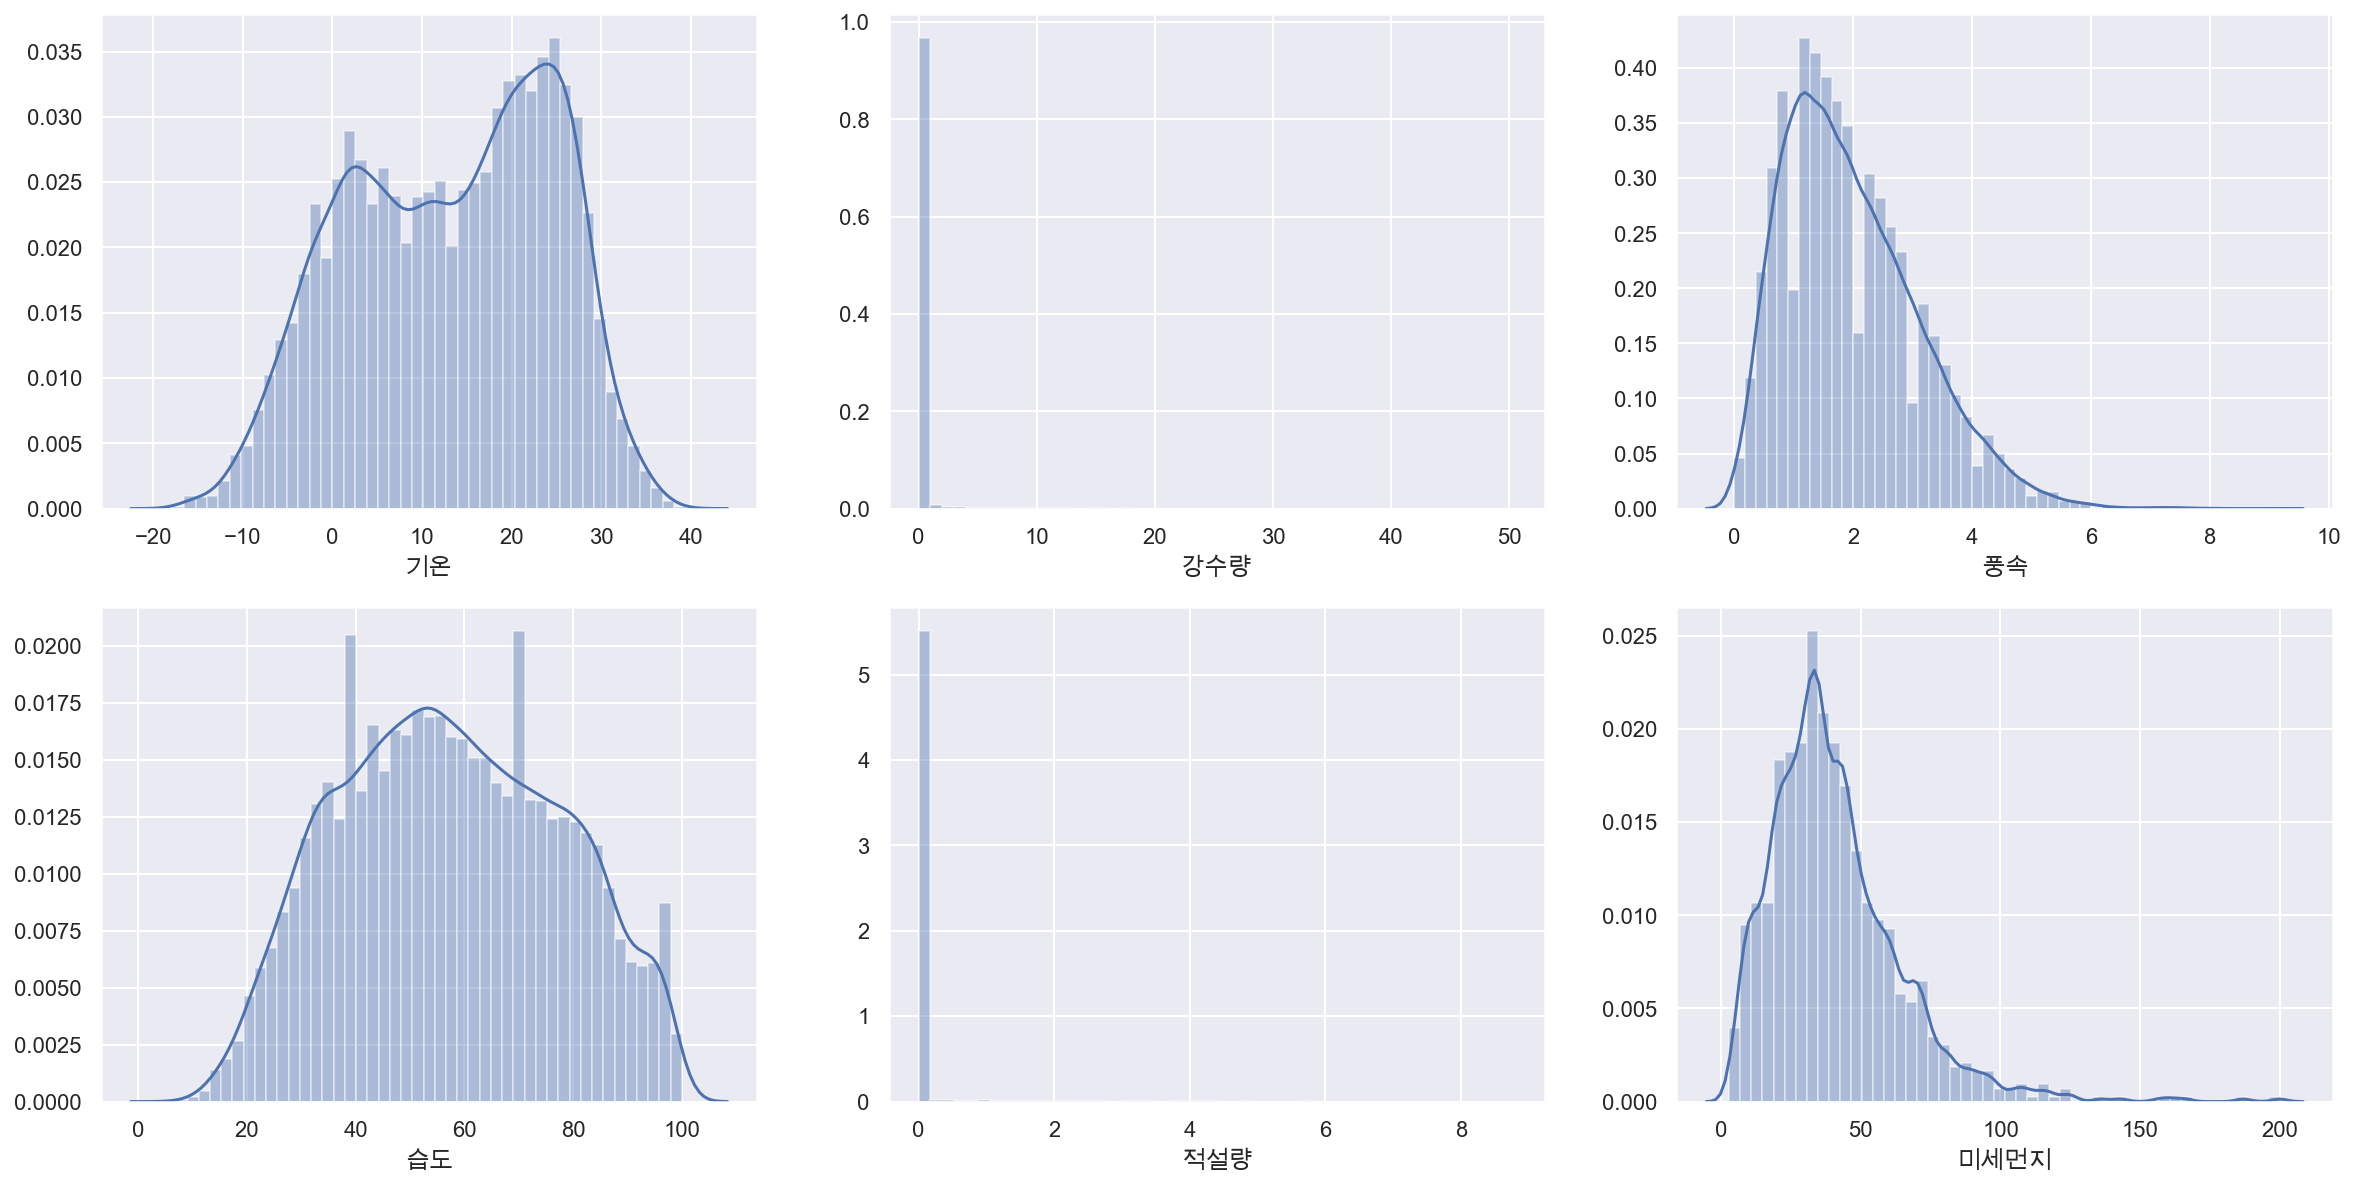

In [145]:
# 기온, 강수량, 풍속, 습도, 적설량, 미세먼지 값 분포 확인
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.distplot(df["기온"], ax=axes[0, 0], label="기온")
sns.distplot(df["강수량"], ax=axes[0, 1], label="강수량")
sns.distplot(df["풍속"], ax=axes[0, 2], label="풍속")
sns.distplot(df["습도"], ax=axes[1, 0], label="습도")
sns.distplot(df["적설량"], ax=axes[1, 1], label="적설량")
sns.distplot(df["미세먼지"], ax=axes[1, 2], label="미세먼지")

# 강수량과 적설량이 지나치게 0에 편중되어 있음을 확인

In [146]:
# 강수량, 적설량 로그화 진행

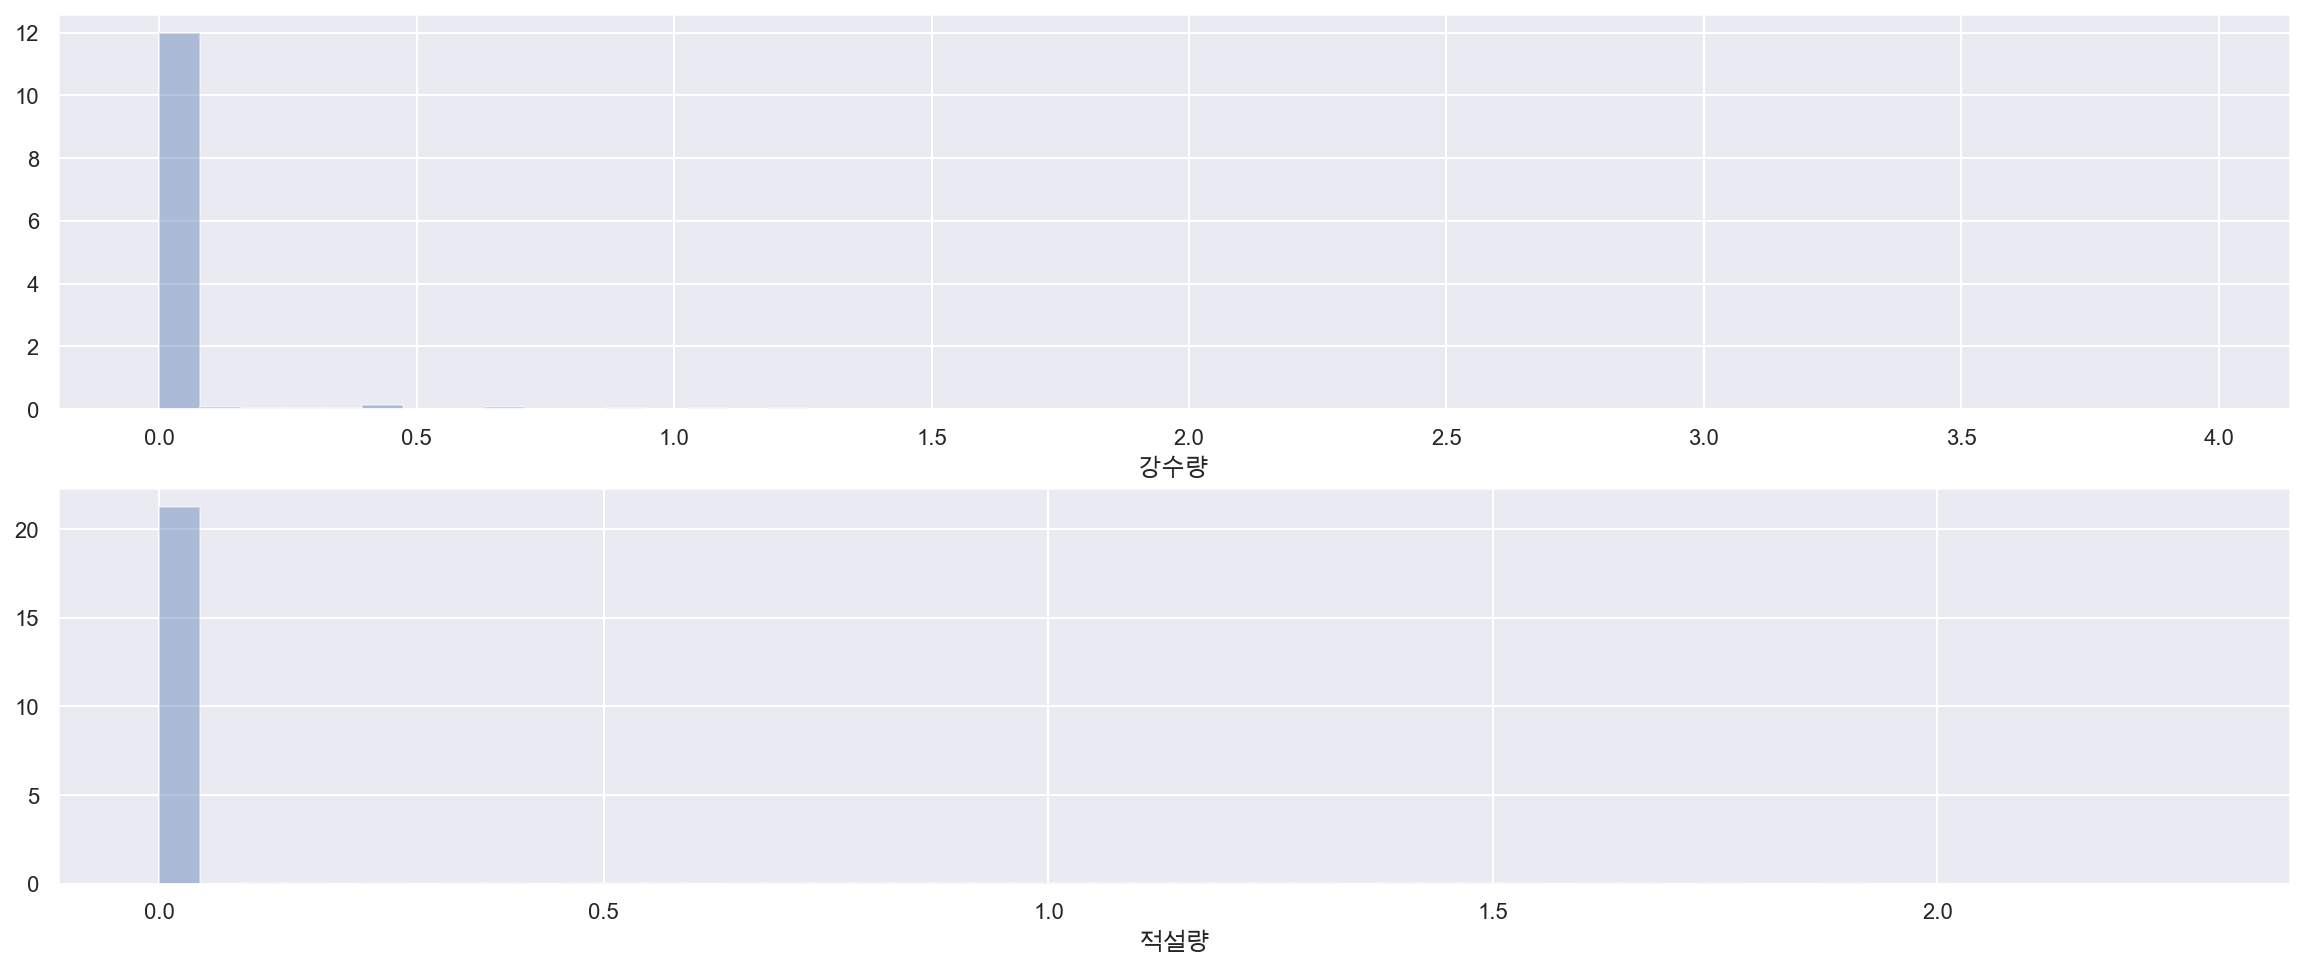

In [147]:
df2 = df.copy()

y_target = df2['통화건수']
X_features = df2.drop('통화건수',axis=1)

X_features["강수량"] = np.log1p(X_features["강수량"])
X_features["적설량"] = np.log1p(X_features["적설량"])

fig, axes = plt.subplots(nrows=2, figsize=(20,8))
sns.distplot(X_features["강수량"], ax=axes[0], label="강수량")
sns.distplot(X_features["적설량"], ax=axes[1], label="적설량")

# 뚜렷하게 나타나진 않지만, x축 값의 scale이 많이 줄어들엇음

In [148]:
# 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=13)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 모델 예측 
mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))


### 릿지, 라쏘
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Ridge > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

lasso = Lasso()
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Lasso > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

RMSE : 17.78316 | MAE : 12.01545 | r2 : 0.87696 
Ridge > RMSE : 17.78075 | MAE : 12.00893 | r2 : 0.87699 
Lasso > RMSE : 27.22169 | MAE : 20.12424 | r2 : 0.71169 


In [149]:
ridge_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0.5}
0.8641912144677624 {'alpha': 0}
0.8646502778760651 {'alpha': 0.05}
0.8646503840749029 {'alpha': 0.1}
0.8646507075983569 {'alpha': 0.5}
0.8646498043099852 {'alpha': 1}
0.864591755176446 {'alpha': 5}


In [150]:
lasso_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0}
0.8646501570201863 {'alpha': 0}
0.8634983290168063 {'alpha': 0.05}
0.8606009272625638 {'alpha': 0.1}
0.8029709823857747 {'alpha': 0.5}
0.6915787930311572 {'alpha': 1}


### 그럼 이제 표준화(Standardization) 진행!

In [151]:
from sklearn.preprocessing import StandardScaler
# 데이터 분류
scaled_cols = ["기온", "강수량", "풍속", "습도", "적설량", "미세먼지", "초미세먼지"]

scaler = StandardScaler()
scaler.fit(X_features[scaled_cols])
X_scaled = scaler.transform(X_features[scaled_cols])
X_features[scaled_cols] = X_scaled

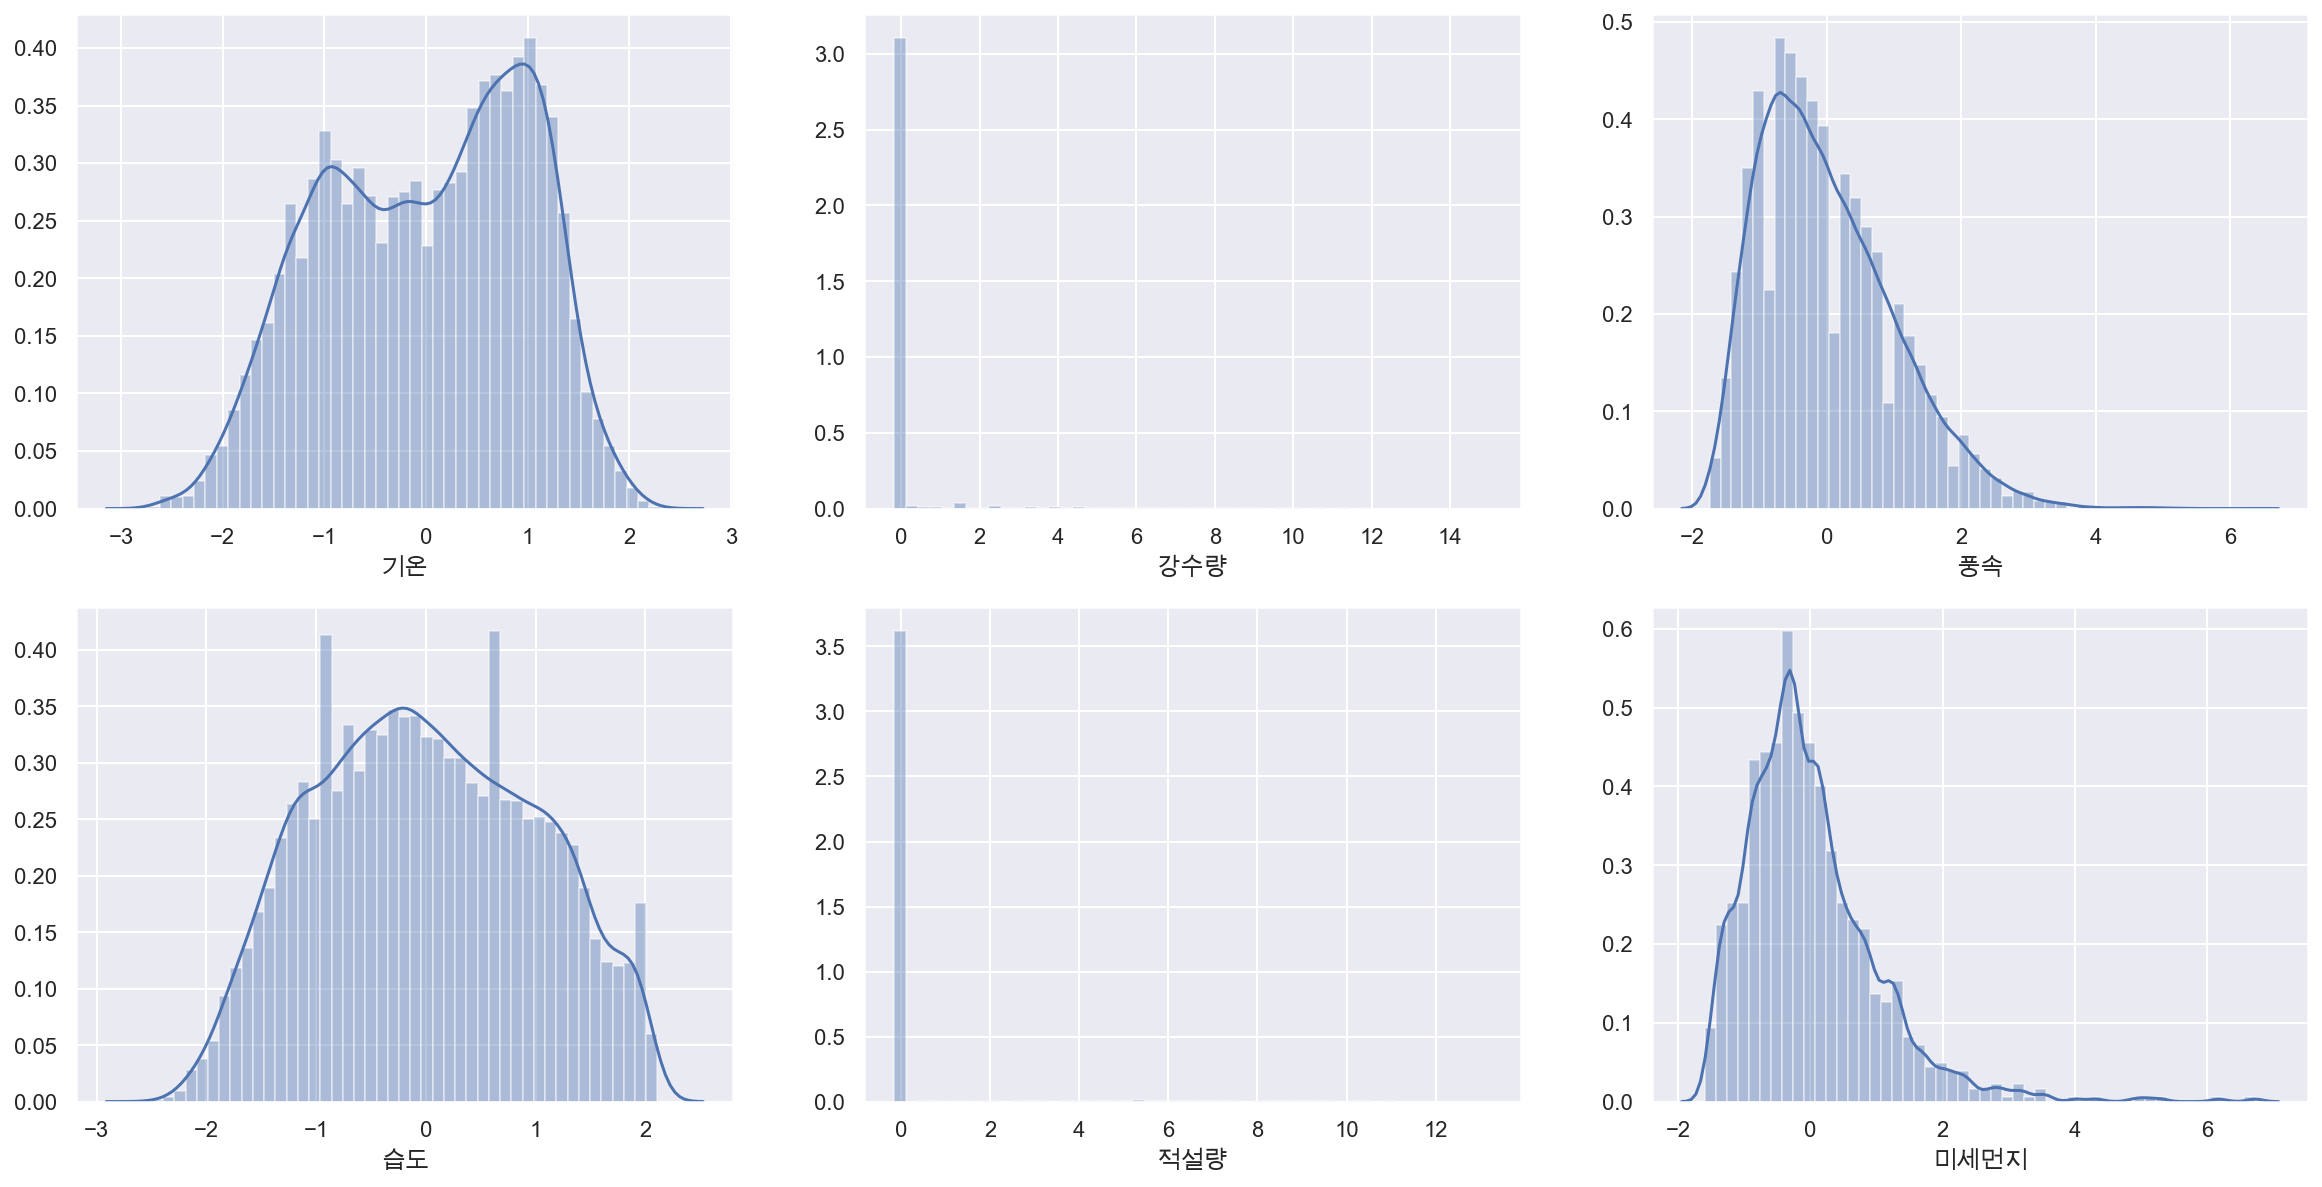

In [152]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.distplot(X_features["기온"], ax=axes[0, 0], label="기온")
sns.distplot(X_features["강수량"], ax=axes[0, 1], label="강수량")
sns.distplot(X_features["풍속"], ax=axes[0, 2], label="풍속")
sns.distplot(X_features["습도"], ax=axes[1, 0], label="습도")
sns.distplot(X_features["적설량"], ax=axes[1, 1], label="적설량")
sns.distplot(X_features["미세먼지"], ax=axes[1, 2], label="미세먼지")

# 그래프에 잘 보이진 않지만 강수량과 적설량도 표준화가 됨 (아래 describe 참조)

In [153]:
X_features.describe()

,기온,강수량,풍속,습도,적설량,미세먼지,초미세먼지,연_2016,연_2017,연_2018,...,요일_금,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,공휴일_-1,공휴일_0,공휴일_1
count,2.628000e+04,2.628000e+04,2.628000e+04,2.628000e+04,2.628000e+04,2.628000e+04,2.628000e+04,26280.000000,26280.000000,26280.000000,...,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,5.930399e-16,-6.397141e-15,3.642051e-15,5.802795e-17,-1.940917e-14,4.295575e-14,7.571683e-15,0.084018,0.333333,0.333333,...,0.142466,0.142466,0.142466,0.143379,0.143379,0.143379,0.142466,0.016438,0.952511,0.031050
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.277420,0.471413,0.471413,...,0.349534,0.349534,0.349534,0.350466,0.350466,0.350466,0.349534,0.127156,0.212686,0.173457
min,-2.732264e+00,-1.819461e-01,-1.740157e+00,-2.496309e+00,-1.546609e-01,-1.597170e+00,-1.389330e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.362114e-01,-1.819461e-01,-7.681880e-01,-7.629565e-01,-1.546609e-01,-6.666889e-01,-6.817929e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.858691e-02,-1.819461e-01,-1.496620e-01,-2.009128e-02,-1.546609e-01,-2.014486e-01,-2.101018e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.481893e-01,-1.819461e-01,6.455857e-01,7.722983e-01,-1.546609e-01,4.752646e-01,3.795121e-01,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.312119e+00,1.504123e+01,6.300681e+00,2.109456e+00,1.323800e+01,6.734862e+00,7.454879e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
# 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=13)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 모델 예측 
mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

### 릿지, 라쏘
ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Ridge > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

lasso = Lasso()
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Lasso > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

RMSE : 17.78588 | MAE : 12.01408 | r2 : 0.87692 
Ridge > RMSE : 17.78076 | MAE : 12.00895 | r2 : 0.87699 
Lasso > RMSE : 27.19568 | MAE : 20.19904 | r2 : 0.71224 


In [155]:
ridge_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0.5}
0.8643638334172529 {'alpha': 0}
0.8646502777223348 {'alpha': 0.05}
0.8646503837059336 {'alpha': 0.1}
0.8646507033488549 {'alpha': 0.5}
0.8646497900716585 {'alpha': 1}
0.8645915029970823 {'alpha': 5}


In [156]:
lasso_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0}
0.8646501570201863 {'alpha': 0}
0.8634928699644119 {'alpha': 0.05}
0.8607678836544779 {'alpha': 0.1}
0.804959092598654 {'alpha': 0.5}
0.692596497157651 {'alpha': 1}


### 이상치를 제거해보자 (z-score 절대값이 2가 넘는 것들)

In [157]:
# 로그-표준화한 피쳐값 원래 데이터프레임에 넣어줌
df2[scaled_cols] = X_features[scaled_cols]

In [158]:
import scipy as sp
import scipy.stats

# check Z score 
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in df2[scaled_cols]:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(df2[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()

Check 기온
기온 Has outliers
 1846    -2.017937
2522    -2.000300
2539    -2.000300
2540    -2.009119
2541    -2.035575
           ...   
24943    2.065191
24944    2.074010
25038    2.021097
25039    2.056372
25040    2.021097
Name: 기온_Zscore, Length: 453, dtype: float64

Check 강수량
강수량 Has outliers
 29       6.034026
30       3.356953
32       3.356953
33       5.627103
34       7.600014
           ...   
25801    4.310376
25812    4.061115
25817    4.429222
25818    2.297023
25835    2.683565
Name: 강수량_Zscore, Length: 775, dtype: float64

Check 풍속
풍속 Has outliers
 31       2.766246
32       2.059359
33       2.236081
34       2.589525
60       2.412803
           ...   
26070    2.677885
26074    2.501164
26075    2.501164
26078    2.059359
26100    2.412803
Name: 풍속_Zscore, Length: 1044, dtype: float64

Check 습도
습도 Has outliers
 703     -2.100114
704     -2.199163
705     -2.050589
1986     2.010407
1987     2.059931
           ...   
22734   -2.149638
22735   -2.199163
22736   -2.19916

In [159]:
print("이상치 제거 전", df2.shape)
all_outlier_idx = sum(outlier_idx_list,[])
df2 = df2.drop(all_outlier_idx)
print("이상치 제거 후", df2.shape)

이상치 제거 전 (26280, 89)
이상치 제거 후 (22059, 89)


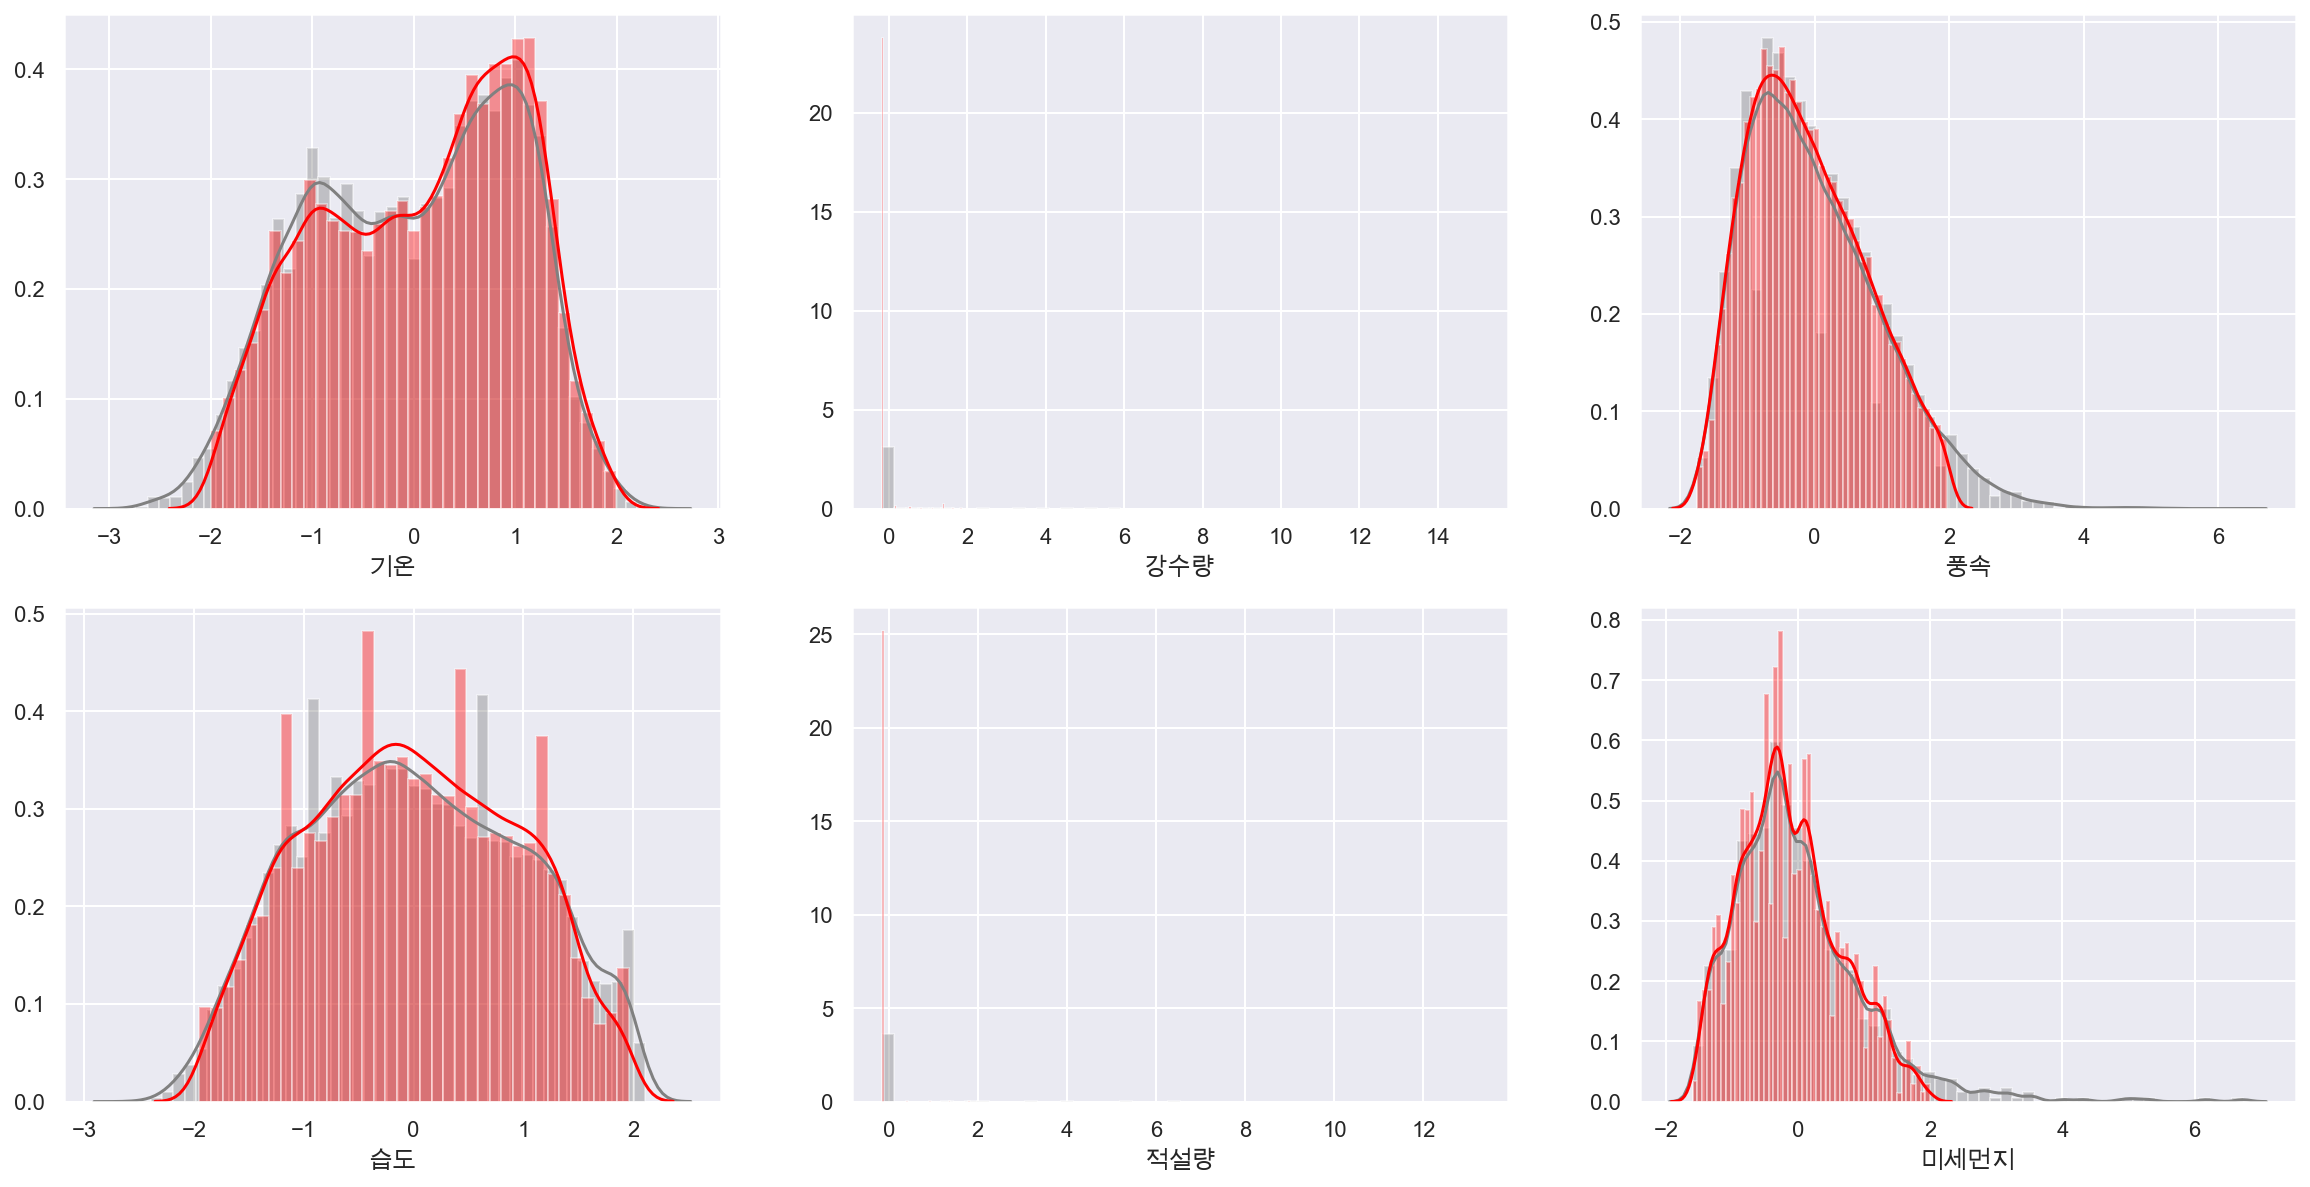

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.distplot(X_features["기온"], ax=axes[0, 0], label="기온", color='gray')
sns.distplot(df2["기온"], ax=axes[0, 0], label="기온", color='red')

sns.distplot(X_features["강수량"], ax=axes[0, 1], label="강수량", color='gray')
sns.distplot(df2["강수량"], ax=axes[0, 1], label="강수량", color='red')

sns.distplot(X_features["풍속"], ax=axes[0, 2], label="풍속", color='gray')
sns.distplot(df2["풍속"], ax=axes[0, 2], label="풍속", color='red')

sns.distplot(X_features["습도"], ax=axes[1, 0], label="습도", color='gray')
sns.distplot(df2["습도"], ax=axes[1, 0], label="습도", color='red')

sns.distplot(X_features["적설량"], ax=axes[1, 1], label="적설량", color='gray')
sns.distplot(df2["적설량"], ax=axes[1, 1], label="적설량", color='red')

sns.distplot(X_features["미세먼지"], ax=axes[1, 2], label="미세먼지", color='gray')
sns.distplot(df2["미세먼지"], ax=axes[1, 2], label="미세먼지", color='red')

In [161]:
# 모델 학습
y_target = df2['통화건수']
X_features = df2.drop('통화건수',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=13)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 모델 예측 
mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))


### 릿지, 라쏘
ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Ridge > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

lasso = Lasso()
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Lasso > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

RMSE : 18.52559 | MAE : 12.10432 | r2 : 0.86883 
Ridge > RMSE : 18.52606 | MAE : 12.09717 | r2 : 0.86883 
Lasso > RMSE : 28.06475 | MAE : 20.28835 | r2 : 0.69898 


In [162]:
ridge_grid_search_cv(X_train, y_train)
lasso_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0.5}
0.8633877597290527 {'alpha': 0}
0.8642005337985681 {'alpha': 0.05}
0.8642007720448444 {'alpha': 0.1}
0.8642019308356573 {'alpha': 0.5}
0.8642015250097235 {'alpha': 1}
0.8641267754863854 {'alpha': 5}
best_params_:  {'alpha': 0}
0.8642002747166971 {'alpha': 0}
0.863434208570594 {'alpha': 0.05}
0.860765165235874 {'alpha': 0.1}
0.8049763782911837 {'alpha': 0.5}
0.6936781795039906 {'alpha': 1}


### 정규화 진행

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaled_cols = ["기온", "강수량", "풍속", "습도", "적설량", "미세먼지", "초미세먼지"]

scaler = MinMaxScaler()
scaler.fit(X_features[scaled_cols])
X_scaled = scaler.transform(X_features[scaled_cols])
X_features[scaled_cols] = X_scaled

print('feature들의 최소 값')
print(X_features[scaled_cols].min())
print('\nfeature들의 최대 값')
print(X_features[scaled_cols].max())

feature들의 최소 값
기온       0.0
강수량      0.0
풍속       0.0
습도       0.0
적설량      0.0
미세먼지     0.0
초미세먼지    0.0
dtype: float64

feature들의 최대 값
기온       1.0
강수량      1.0
풍속       1.0
습도       1.0
적설량      1.0
미세먼지     1.0
초미세먼지    1.0
dtype: float64


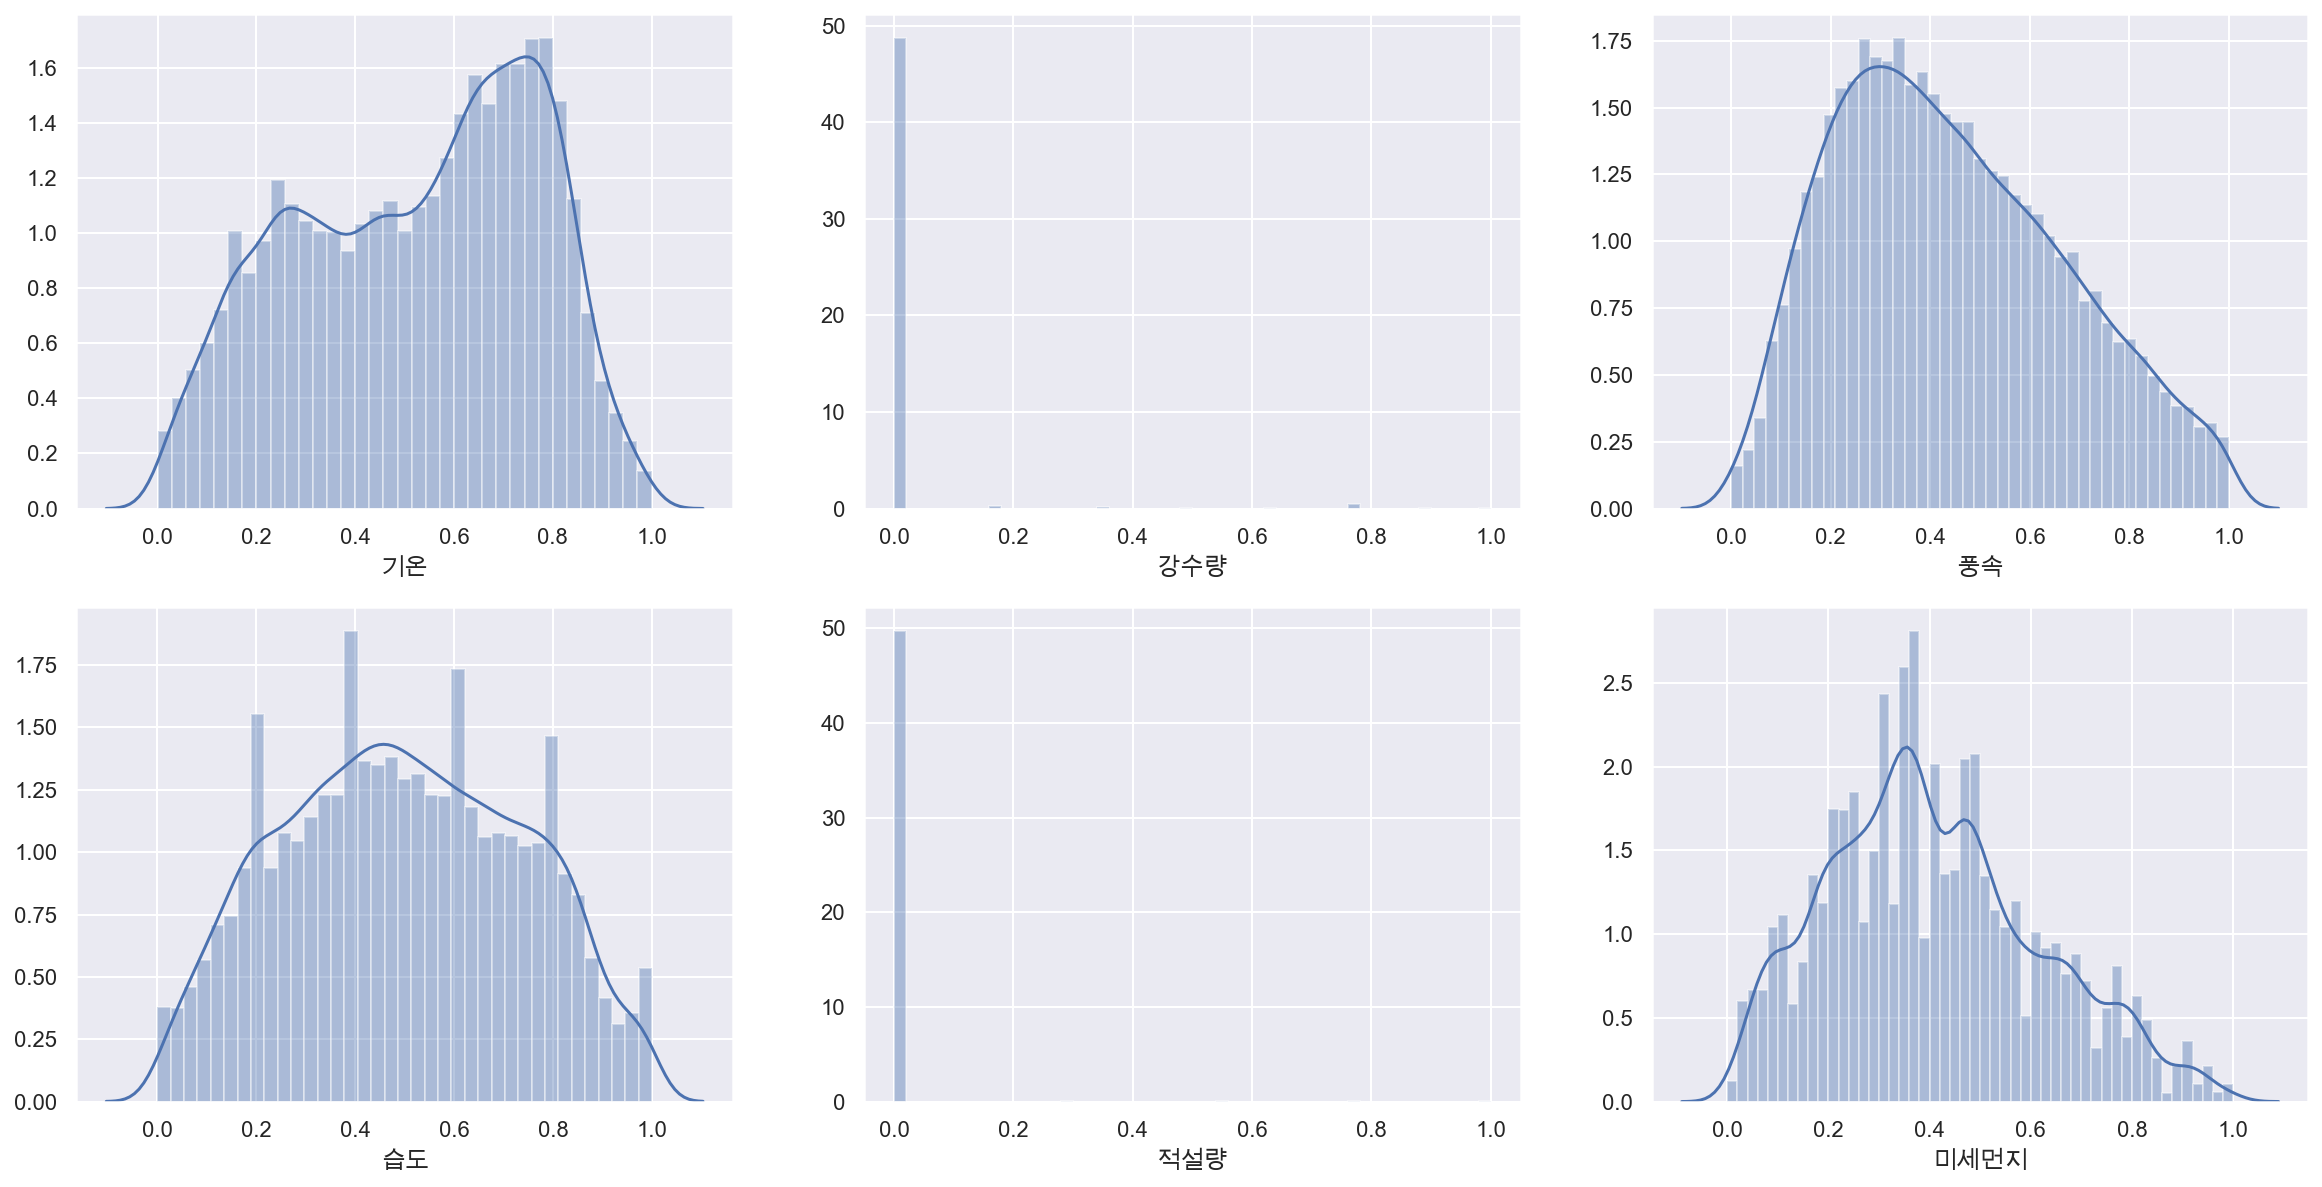

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.distplot(X_features["기온"], ax=axes[0, 0], label="기온")
sns.distplot(X_features["강수량"], ax=axes[0, 1], label="강수량")
sns.distplot(X_features["풍속"], ax=axes[0, 2], label="풍속")
sns.distplot(X_features["습도"], ax=axes[1, 0], label="습도")
sns.distplot(X_features["적설량"], ax=axes[1, 1], label="적설량")
sns.distplot(X_features["미세먼지"], ax=axes[1, 2], label="미세먼지")

In [165]:
# 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=13)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 모델 예측 
mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

### 릿지, 라쏘
ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Ridge > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

lasso = Lasso()
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Lasso > RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

RMSE : 18.52562 | MAE : 12.1041 | r2 : 0.86883 
Ridge > RMSE : 18.52612 | MAE : 12.09704 | r2 : 0.86883 
Lasso > RMSE : 28.01538 | MAE : 20.69272 | r2 : 0.70003 


In [166]:
ridge_grid_search_cv(X_train, y_train)
lasso_grid_search_cv(X_train, y_train)

best_params_:  {'alpha': 0.5}
0.8624766999645136 {'alpha': 0}
0.8642005657388996 {'alpha': 0.05}
0.8642008352490567 {'alpha': 0.1}
0.8642022215980554 {'alpha': 0.5}
0.8642020519769282 {'alpha': 1}
0.8641285936377858 {'alpha': 5}
best_params_:  {'alpha': 0}
0.8642002747166971 {'alpha': 0}
0.8634643611383733 {'alpha': 0.05}
0.8611243169913394 {'alpha': 0.1}
0.8088959726534893 {'alpha': 0.5}
0.6933233035452644 {'alpha': 1}


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [36]:
#### 피쳐스케일링 없는게 가장 나았으니 기본으로 돌려보자

In [37]:
df2 = df.copy()
y_target = df2['통화건수']
X_features = df2.drop('통화건수',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=13)

In [38]:
#----------------- Decsion Tree를 활용한 회귀모델 --------------
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(X_train, y_train)
delivery_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, delivery_predictions)
tree_rmse = np.sqrt(tree_mse)
print("tree_rmse: ", tree_rmse)
print("r2_score: ", r2_score(y_test, delivery_predictions))

tree_rmse:  19.50911727954112
r2_score:  0.8519163061403292


In [39]:
# k-fold 교차검증준비
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_test, y_test, scoring = "neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
def display_socres(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_socres(tree_rmse_scores)

점수: [20.1471914  19.0110771  18.66750081 18.14772399 18.06323495]
평균: 18.80734565106128
표준편차: 0.7543276747402285


In [103]:
# 선형회귀 평가 
lin_scores = cross_val_score(lr_reg, X_test, y_test, scoring = "neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_socres(lin_rmse_scores)

점수: [17.81748883 17.08912375 18.85352266 16.31908696 18.94108102]
평균: 17.804060643436742
표준편차: 1.0110042326910178


In [179]:
# random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=70,random_state=11)
forest_reg.fit(X_train, y_train)
pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
print("tree_rmse: ", forest_rmse)
print("r2_score: ", r2_score(y_test, pred))

tree_rmse:  13.753938037438765
r2_score:  0.9263985912301986


In [173]:
for_scores = cross_val_score(forest_reg, X_test, y_test, scoring = "neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-for_scores)

In [175]:
display_socres(forest_rmse_scores)

점수: [14.00089599 14.34047885 15.01446033 12.91970093 14.54185166]
평균: 14.163477552040154
표준편차: 0.7031473762274897


# <추가> Randomforest GridsearchCV

In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 50, 70, 100], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2,3,4] }
    ]

forest_reg = RandomForestRegressor(random_state=13)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 70]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [177]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 70}

In [178]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=70, random_state=13)

In [180]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

36.24124184147516 {'max_features': 2, 'n_estimators': 3}
28.20720715234268 {'max_features': 2, 'n_estimators': 10}
26.44927192826753 {'max_features': 2, 'n_estimators': 30}
25.583759911021094 {'max_features': 2, 'n_estimators': 50}
25.434068505760656 {'max_features': 2, 'n_estimators': 70}
27.81015122687857 {'max_features': 4, 'n_estimators': 3}
22.55672013595643 {'max_features': 4, 'n_estimators': 10}
20.797123964870288 {'max_features': 4, 'n_estimators': 30}
20.187362215432625 {'max_features': 4, 'n_estimators': 50}
20.094064960912025 {'max_features': 4, 'n_estimators': 70}
23.91752503622736 {'max_features': 6, 'n_estimators': 3}
20.147036991599347 {'max_features': 6, 'n_estimators': 10}
18.56871070027902 {'max_features': 6, 'n_estimators': 30}
18.095714638109612 {'max_features': 6, 'n_estimators': 50}
17.848195588062534 {'max_features': 6, 'n_estimators': 70}
22.188244093297744 {'max_features': 8, 'n_estimators': 3}
18.47171825648458 {'max_features': 8, 'n_estimators': 10}
17.127473